In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
import h5py
from IPython.display import HTML

In [76]:
z=150.0
T=120
fz=4.2
data=[]
for n in range(2,3):
    path=f"/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_{T}/N_500/z{z}/polymer_{n}_positions.cndb"
    # path=f"/work/cms16/sb95/SAW_globule_extension_const_force/epsilon_1.0/temp_{T}/N_500/fz{fz}/polymer_{n}_positions.cndb"
    pos = h5py.File(path,'r')
    for key in pos.keys():
        data.append(pos[key])
data=np.array(data)
data.shape

(40, 500, 3)

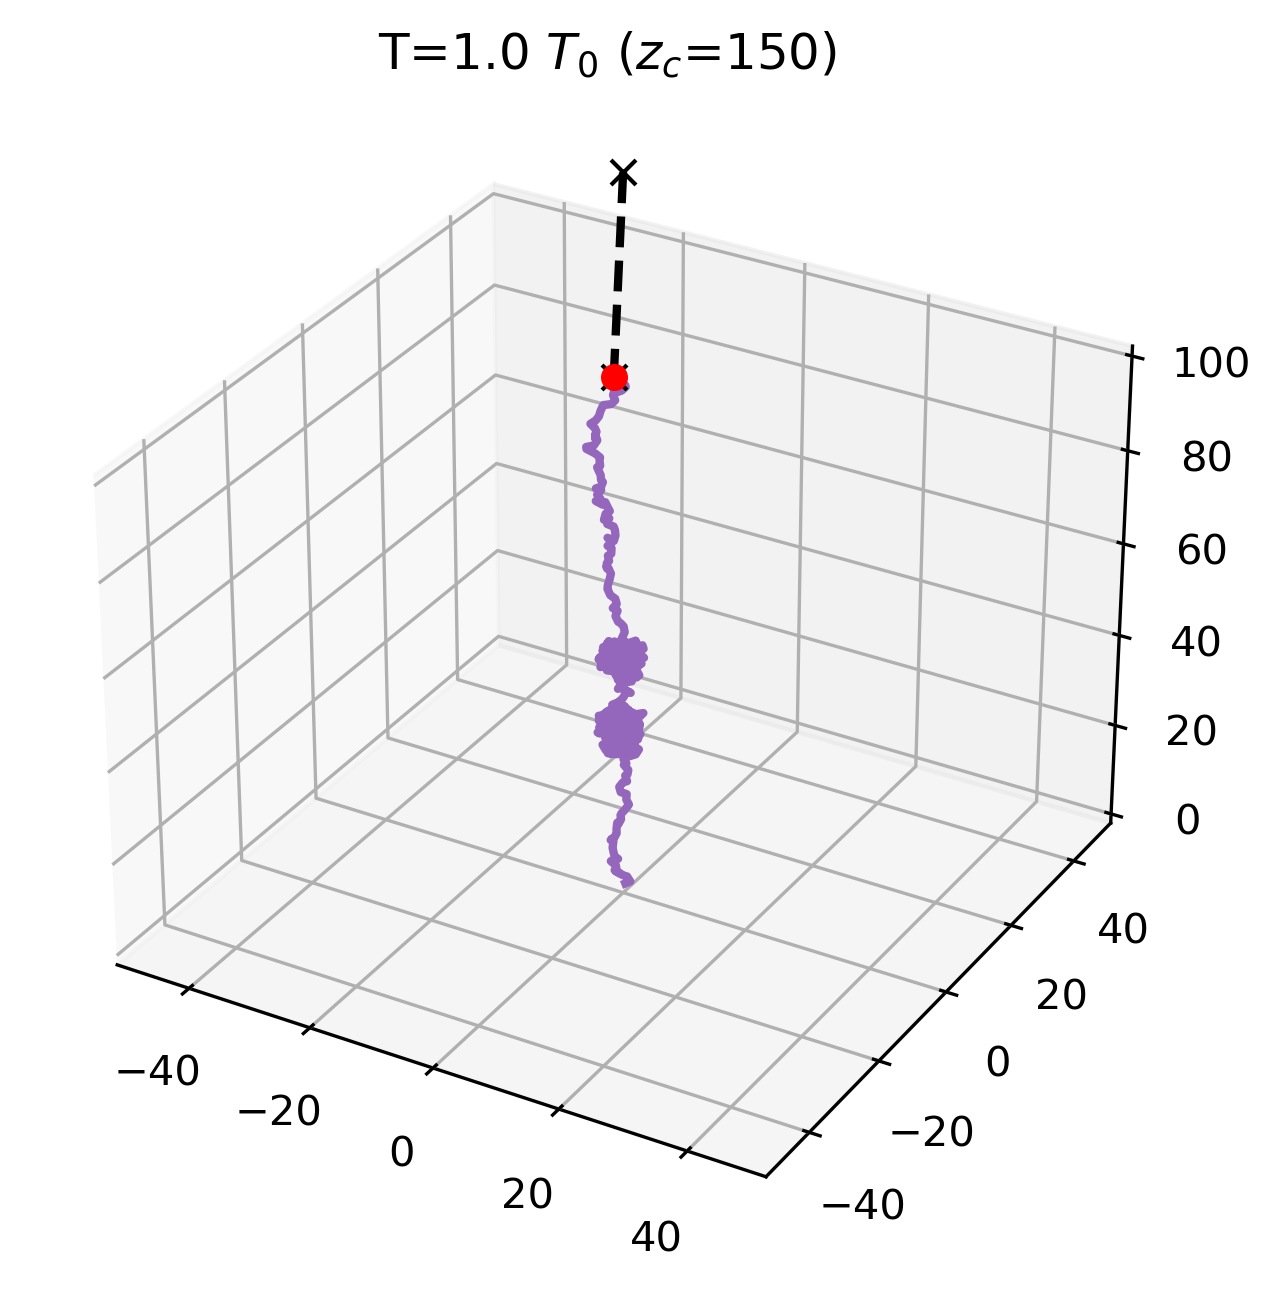

In [77]:
# Set up the 3D figure and axis
fig = plt.figure(figsize=(5,5), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Set axis limits (adjust as needed)
d=z/3
ax.set_xlim(-d,d)
ax.set_ylim(-d,d)
ax.set_zlim(0,2*d)
# ax.set_title(f"T={T/120.:.1f} $T_0$ ($f$={fz:.2f})")
ax.set_title(f"T={T/120.:.1f} $T_0$ ($z_c$={z:.0f})")

# Initial scatter plot
sc = ax.scatter([], [], [], s=50)

# Update function for each frame
def update(frame):
    # for coll in ax.collections:
        # coll.remove()
    ax.clear()
    positions = data[frame]
    sc = ax.scatter(positions[-1, 0], positions[-1, 1], positions[-1, 2], s=30, c='r')
    ln = ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], lw=2, c='C4')
    ax.plot([0,positions[-1,0]], [0, positions[-1,1]], [z, positions[-1,2]], 'x--', c='k', lw=2)
    ax.set_xlim(-d,d)
    ax.set_ylim(-d,d)
    ax.set_zlim(0,2*d)
    # ax.set_title(f"T={T/120.:.1f} $T_0$ ($f$={fz:.2f})")
    ax.set_title(f"T={T/120.:.1f} $T_0$ ($z_c$={z:.0f})")
    return ln,

# Create the animation
anim = FuncAnimation(fig, update, frames=data.shape[0], interval=150, blit=False)

HTML(anim.to_html5_video())